In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv('CustomerChurn.csv')

# Q: To show a record of table

In [80]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12


# Q: To check how many customers are churned?

In [9]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn'>

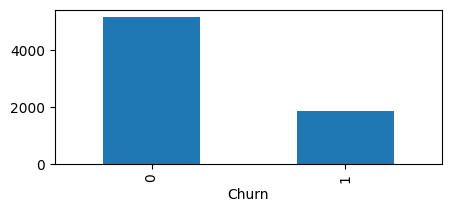

In [83]:
plt.figure(figsize=(5, 2))
data['Churn'].value_counts().plot(kind='bar')

# Conclusion: Almost 26.5% (1869) people are churned.

# Q: To convert TotalCharges datatype to numeric

In [10]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')

# Q: Divide customers into bins based on tenure(eg: for tenure < 12 months, assign tenure group of 1-12 fo tenure between 1 to 2 yrs, tenure group of 13-24)

In [11]:
data['tenure'].max() # to get max tenure

72

In [12]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)] #to divide the tenure into 6 portions
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [13]:
data['tenure_group']=pd.cut(data['tenure'], range(1,80,12),right=False,labels=labels) #to cut the tenure into bins

In [14]:
data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

<Axes: xlabel='tenure_group'>

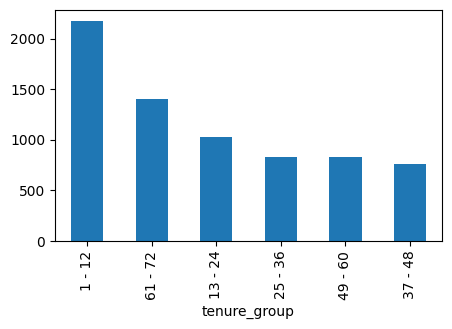

In [86]:
plt.figure(figsize=(5, 3))
data['tenure_group'].value_counts().plot(kind='bar')

# Conclusion: Customers with age range of 1-12 have higher chance of churn(31%)

# Q: Remove columns customerID & tenure

In [15]:
data.drop(columns=['customerID','tenure'],axis=1).head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12


# Q: Univariate analysis for every non-numeric columns

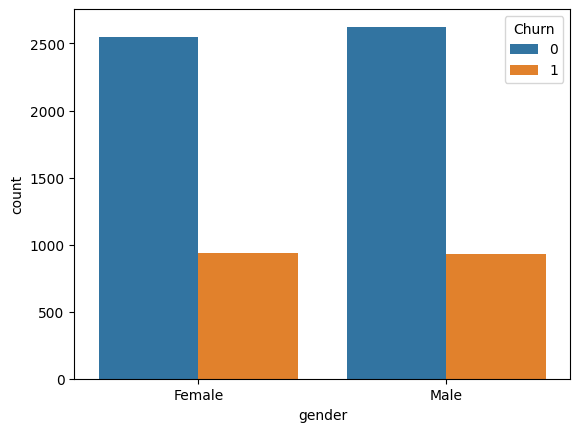

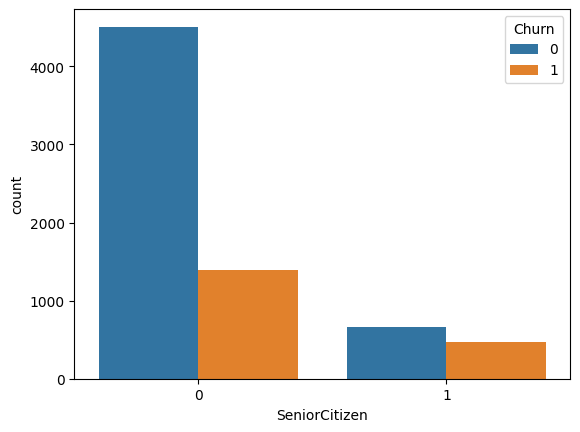

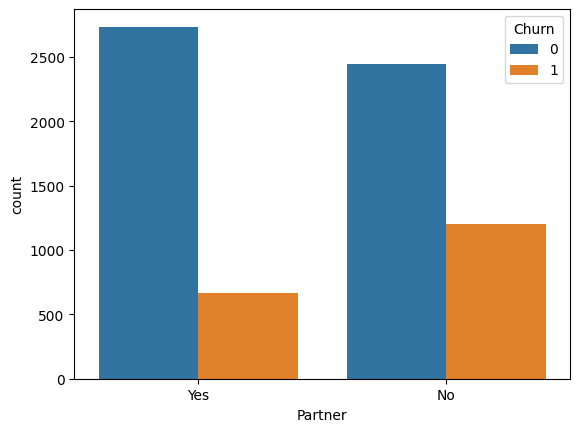

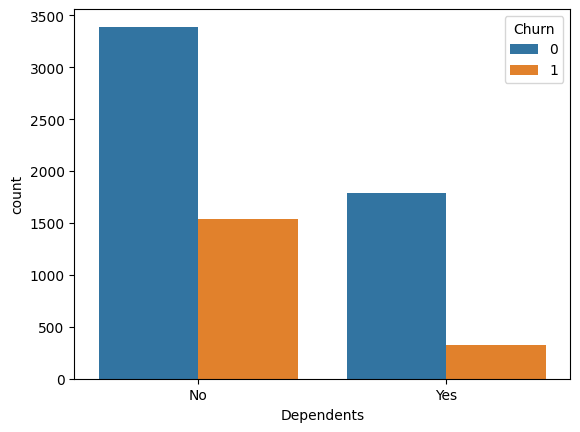

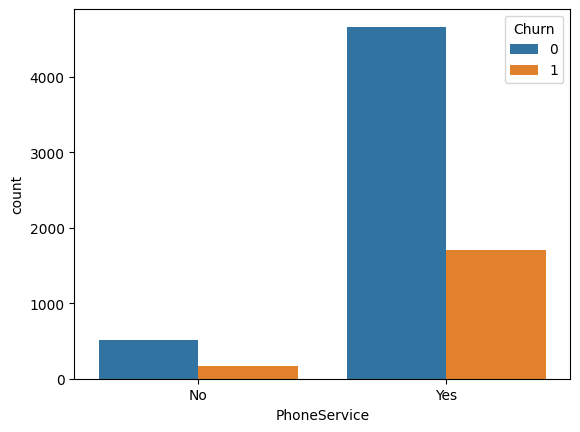

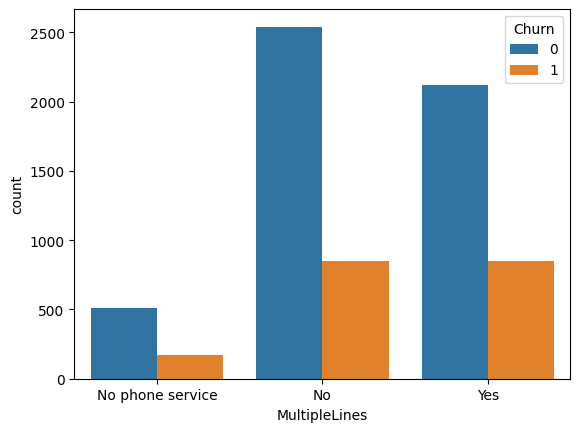

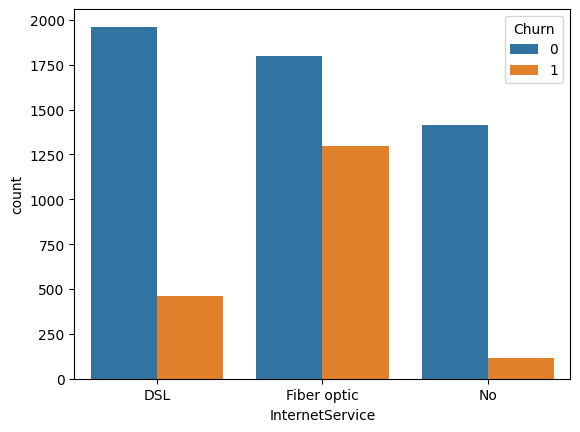

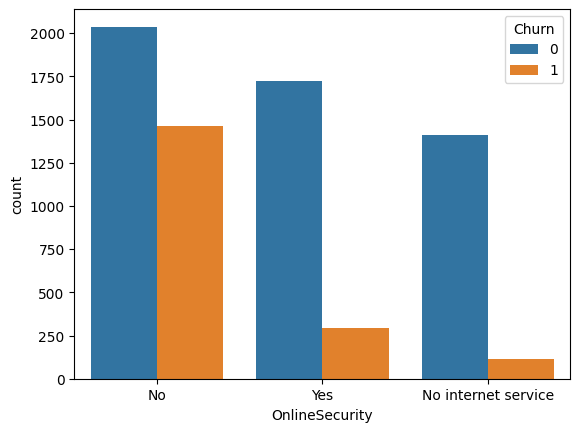

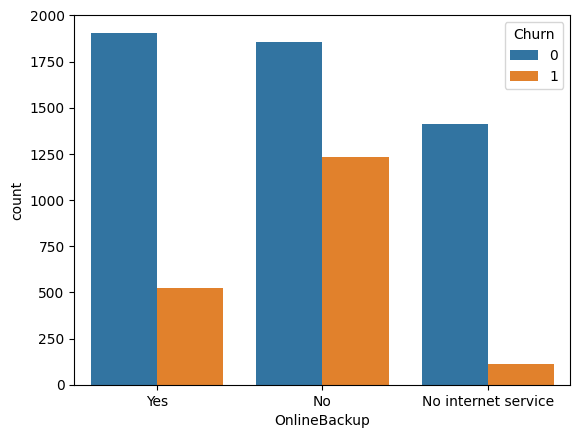

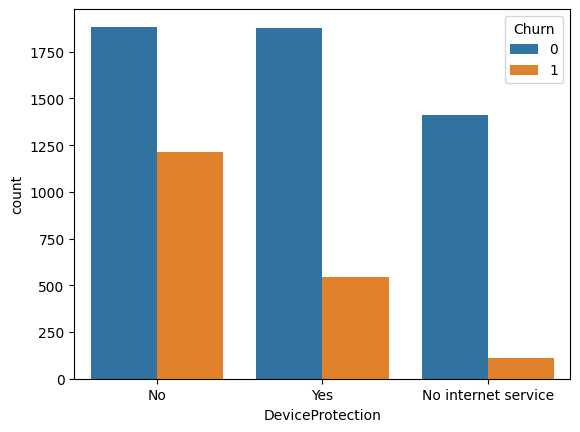

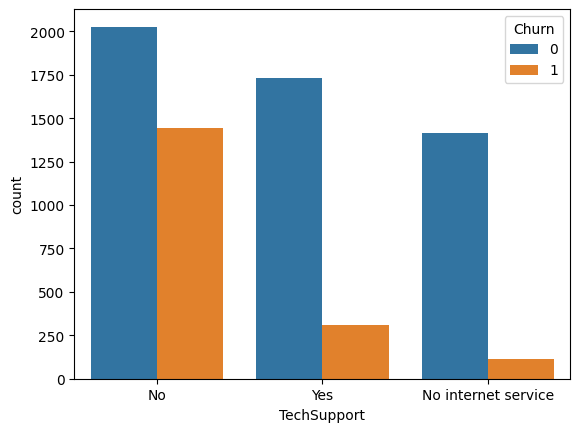

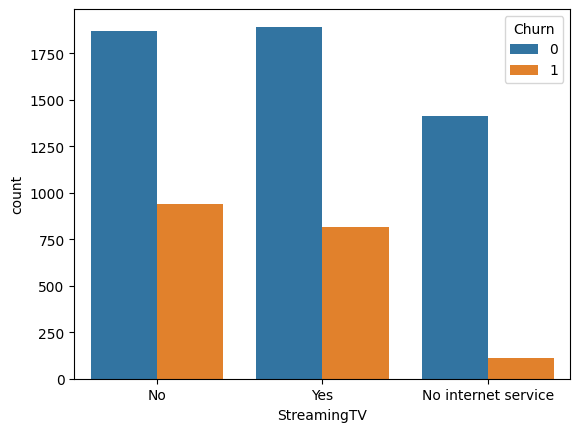

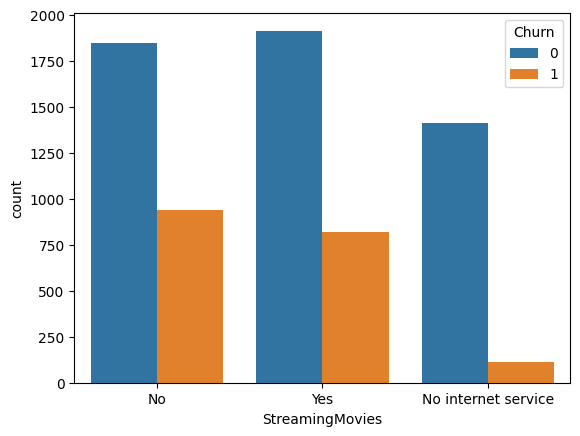

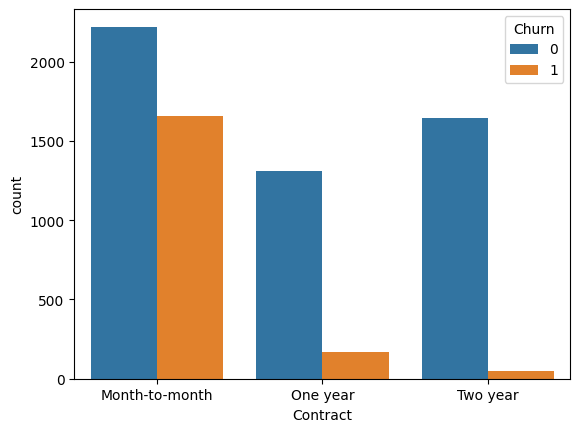

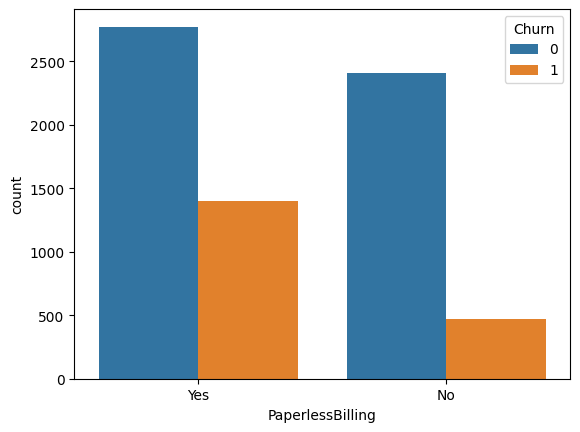

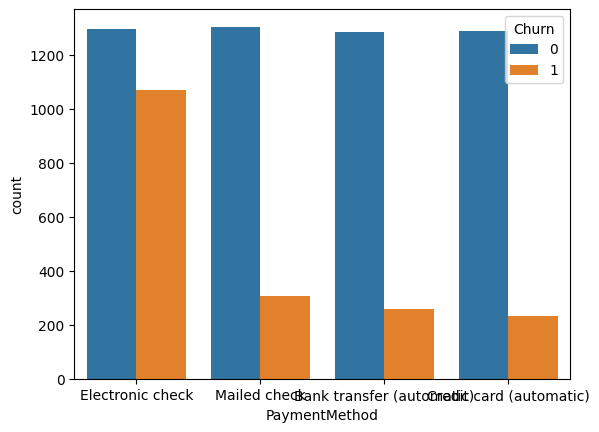

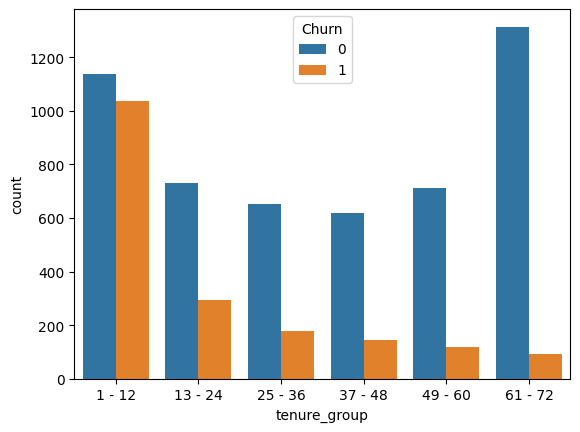

In [81]:
for i, predictor in enumerate(data.drop(columns=['Churn','TotalCharges','MonthlyCharges','customerID','tenure'])): # dropping numeric columns
    sns.countplot(data,x=predictor,hue='Churn')
    plt.show()

# Conclusions:
# 1) Senior Citizen are most likely to churn
# 2) People with no partners are more likely to churn
# 3) Monthly Contracted People are more likely to churn beacuse they are free customers
# 4) People who pay via Electronic Check are more likely to churn

# Q: Show churn with respect to payment method?

In [32]:
pd.crosstab(data['PaymentMethod'],data['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


# Q: Convert column 'Churn' into binary numeric variable (Yes=1, No=0)

In [36]:
data['Churn']=data['Churn'].map({'Yes':1,'No':0})

# Q: Relationship between Monthly Charges & Total Charges

In [41]:
data['MonthlyCharges'].corr(data['TotalCharges'])

0.6510648032262025

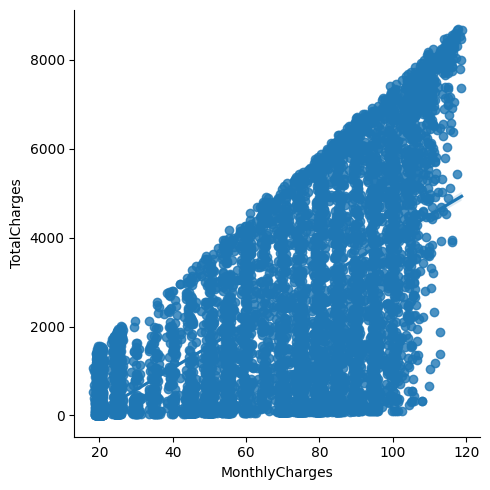

In [40]:
sns.lmplot(data,x='MonthlyCharges',y='TotalCharges')

# Conclusion: Total Charges & Monthly Charges are +ve Co-Related

# Q: Show Churn by Monthly Charges & Total Charges

Text(0.5, 1.0, 'Monthly Charges by Churn')

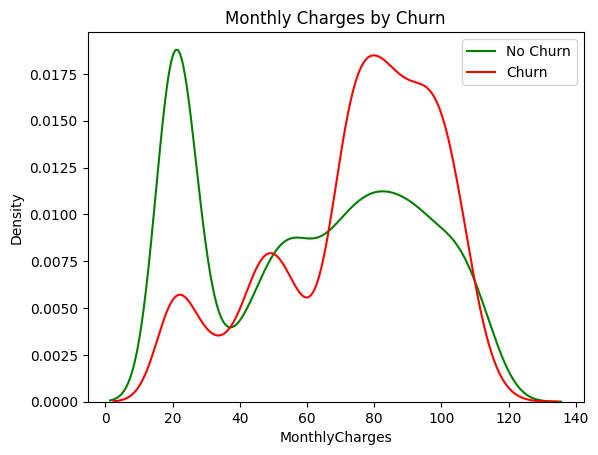

In [51]:
ch=sns.kdeplot(data['MonthlyCharges'][(data['Churn']==0)],color='Green')
ch=sns.kdeplot(data['MonthlyCharges'][(data['Churn']==1)],color='Red')
ch.legend(['No Churn','Churn'])
ch.set_title('Monthly Charges by Churn')

# Conclusion: Churn is higher when Monthly Charges is higher

Text(0.5, 1.0, 'Total Charges by Churn')

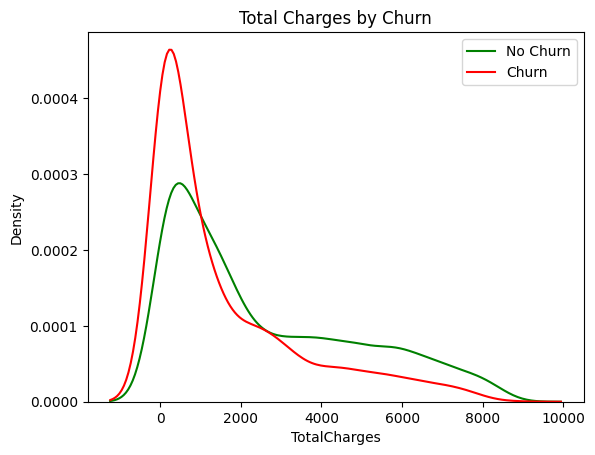

In [52]:
ch=sns.kdeplot(data['TotalCharges'][(data['Churn']==0)],color='Green')
ch=sns.kdeplot(data['TotalCharges'][(data['Churn']==1)],color='Red')
ch.legend(['No Churn','Churn'])
ch.set_title('Total Charges by Churn')

# Conclusion: Churn is higher when Total Charges is low

# Q: Show churn w.r.t gender

In [62]:
churn_z=data.loc[data['Churn']==0]
churn_o=data.loc[data['Churn']==1]

In [70]:
def uniplot(data,col,title,hue=None):
    plt.title(title)
    ax= sns.countplot(data,x=col,order=data[col].value_counts().index, hue=hue)
    plt.show()

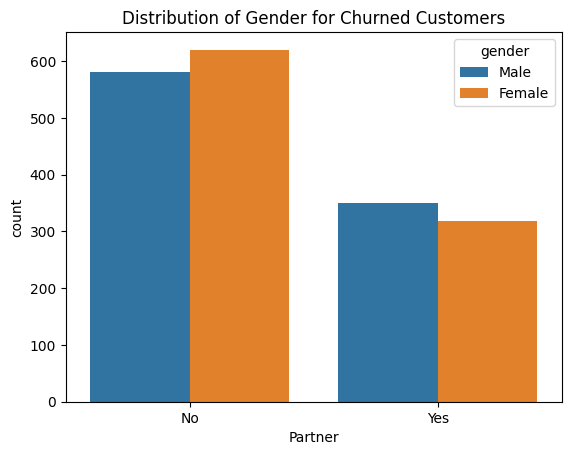

In [71]:
uniplot(churn_o,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

# Conclusion: Female with no Partner have higher churn rate whereas Male with Partner have higher Churn rate

# Q: Show churn w.r.t Payment Method

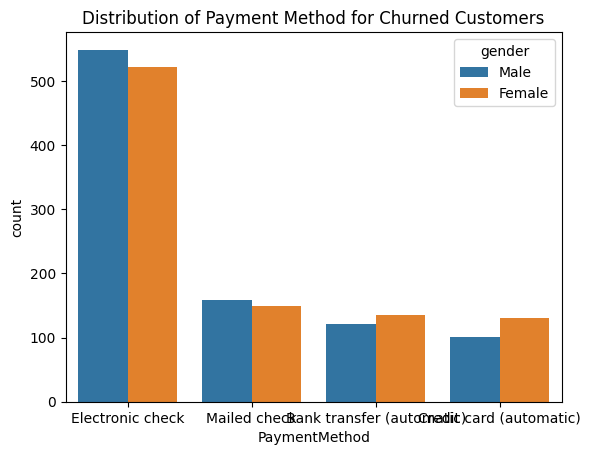

In [74]:
uniplot(churn_o,col='PaymentMethod',title='Distribution of Payment Method for Churned Customers',hue='gender')

# Conclusion: Male who pays via Electronic Check have higher Churn rate whereas Female who pays via 'Credit card (automatic)' have higher churn rate